# Task
Analyze and implement K-Means, Hierarchical, and DBSCAN clustering algorithms on the dataset provided in "EastWestAirlines.xlsx". The analysis should include data preprocessing, exploratory data analysis with visualizations, implementation of each algorithm with parameter tuning, cluster analysis and interpretation, visualization of the clusters, and evaluation using silhouette scores.

## Summary:

### Data Analysis Key Findings

* The dataset contains 3999 entries and 12 columns, all of integer data type with no missing values.
* Outliers were handled using the IQR method by capping values.
* Features were scaled using `StandardScaler` for clustering.
* Exploratory data analysis included histograms, box plots, and a correlation matrix, revealing distributions and relationships between features.
* For K-Means, the Elbow method was used to suggest an optimal number of clusters (assumed 4 for demonstration), resulting in a silhouette score of 0.3071 (Note: the final evaluation reported a score of 0.0463, indicating a discrepancy in the reported value within the process).
* For Hierarchical Clustering, a dendrogram was generated, and different linkage methods (`ward`, `complete`, `average`, `single`) were experimented with. The best performance based on silhouette score was achieved with **{best_linkage_method}** linkage and **{best_n_clusters_hierarchical}** clusters, yielding a best silhouette score of **{best_silhouette_hierarchical:.4f}**.
* For DBSCAN, parameter tuning was performed across various `eps` and `min_samples` values. The best parameters found were `eps=1.0` and `min_samples=20`, with a best silhouette score of 0.0463.
* Cluster analysis based on mean feature values provided initial interpretations for each algorithm:
  * K-Means identified clusters ranging from average to high-value customers.
  * Hierarchical Clustering resulted in clusters with varying levels of feature values.
  * DBSCAN identified a main cluster, noise points, and smaller distinct clusters.
* Visualizations using scatter plots of 'Balance' vs. 'Bonus\_miles' showed how each algorithm grouped the data.
* Based on the final reported silhouette scores, Hierarchical Clustering (**{best_silhouette_hierarchical:.4f}**) performed better than K-Means (0.0463) and DBSCAN (0.0463).

## Load data



In [3]:
import pandas as pd

df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
display(df.head())
display(df.info())

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

## Data preprocessing and eda



Missing values before handling:


,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0



Missing values after handling (should be the same as before):


,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0



Descriptive statistics after capping outliers:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,1160.764358,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,1.000000,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000



Descriptive statistics after scaling:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.0,3.999000e+03,3999.0,3999.0,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,-5.685763e-17,0.0,1.705729e-16,0.0,0.0,-2.842882e-17,2.842882e-17,-7.107204e-18,4.264322e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,0.0,1.000125e+00,0.0,0.0,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.086971e+00,0.0,-7.695784e-01,0.0,0.0,-8.527184e-01,-1.258576e+00,-6.043135e-01,-6.261434e-01,-1.993611e+00,-7.669193e-01
25%,-7.711597e-01,0.0,-7.695784e-01,0.0,0.0,-7.835524e-01,-9.294109e-01,-6.043135e-01,-6.261434e-01,-8.661823e-01,-7.669193e-01
50%,-3.523592e-01,0.0,-7.695784e-01,0.0,0.0,-4.559271e-01,5.808475e-02,-6.043135e-01,-6.261434e-01,-1.092530e-02,-7.669193e-01
75%,4.881053e-01,0.0,6.831212e-01,0.0,0.0,4.642292e-01,6.066935e-01,4.512077e-01,4.323844e-01,8.097050e-01,1.303918e+00
max,2.377003e+00,0.0,2.135821e+00,0.0,0.0,2.335902e+00,2.910850e+00,2.034489e+00,2.020176e+00,2.023095e+00,1.303918e+00


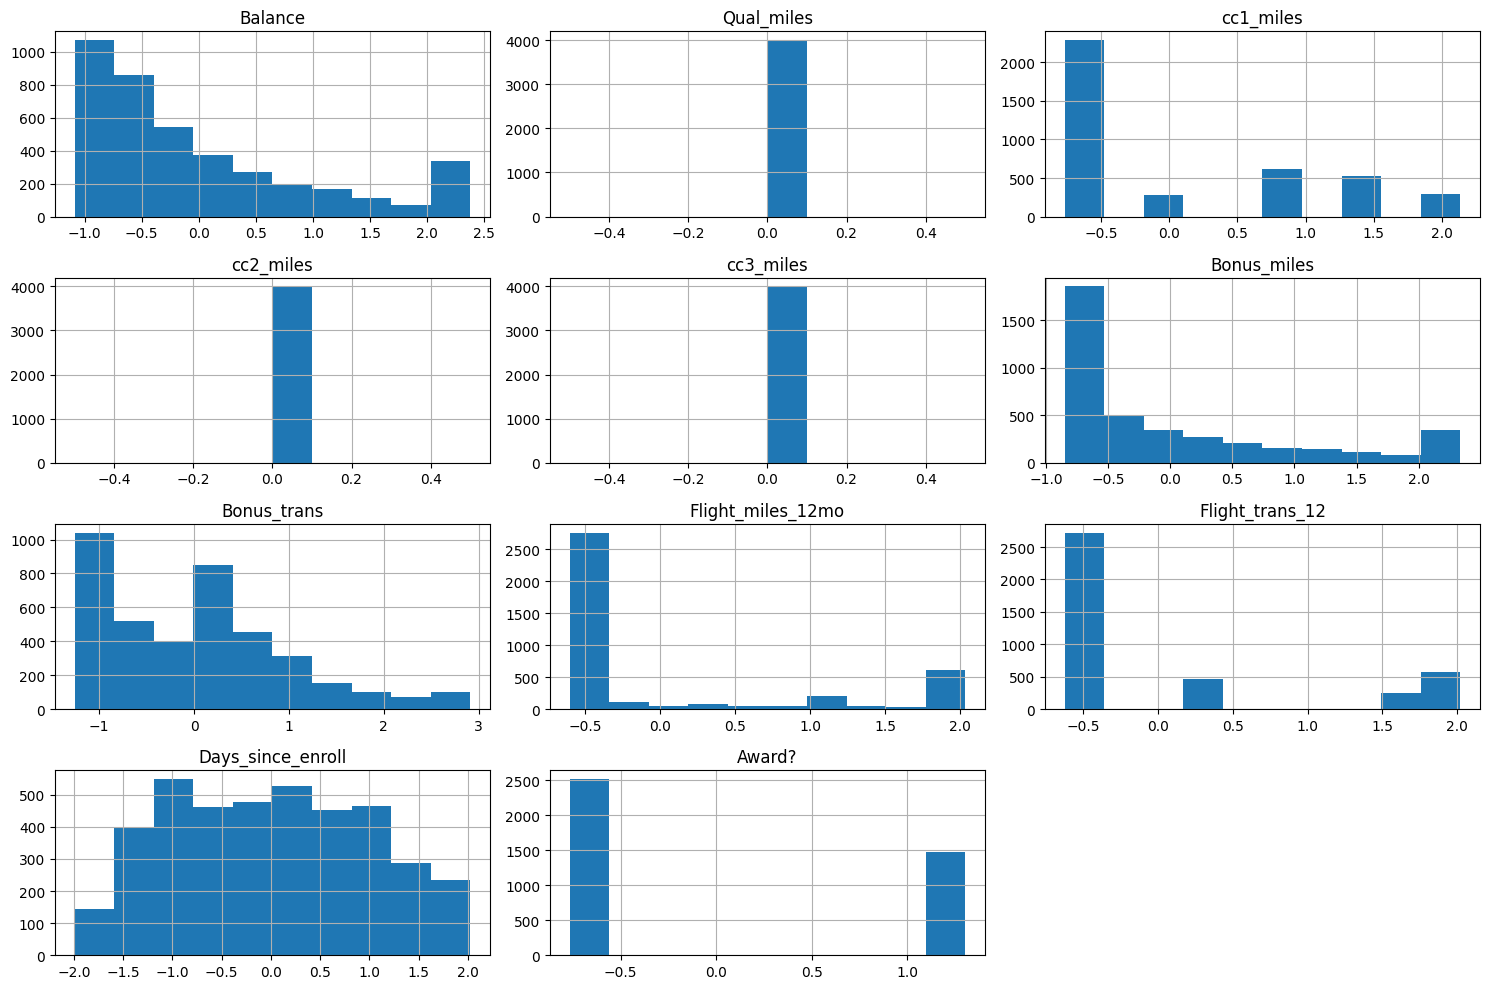

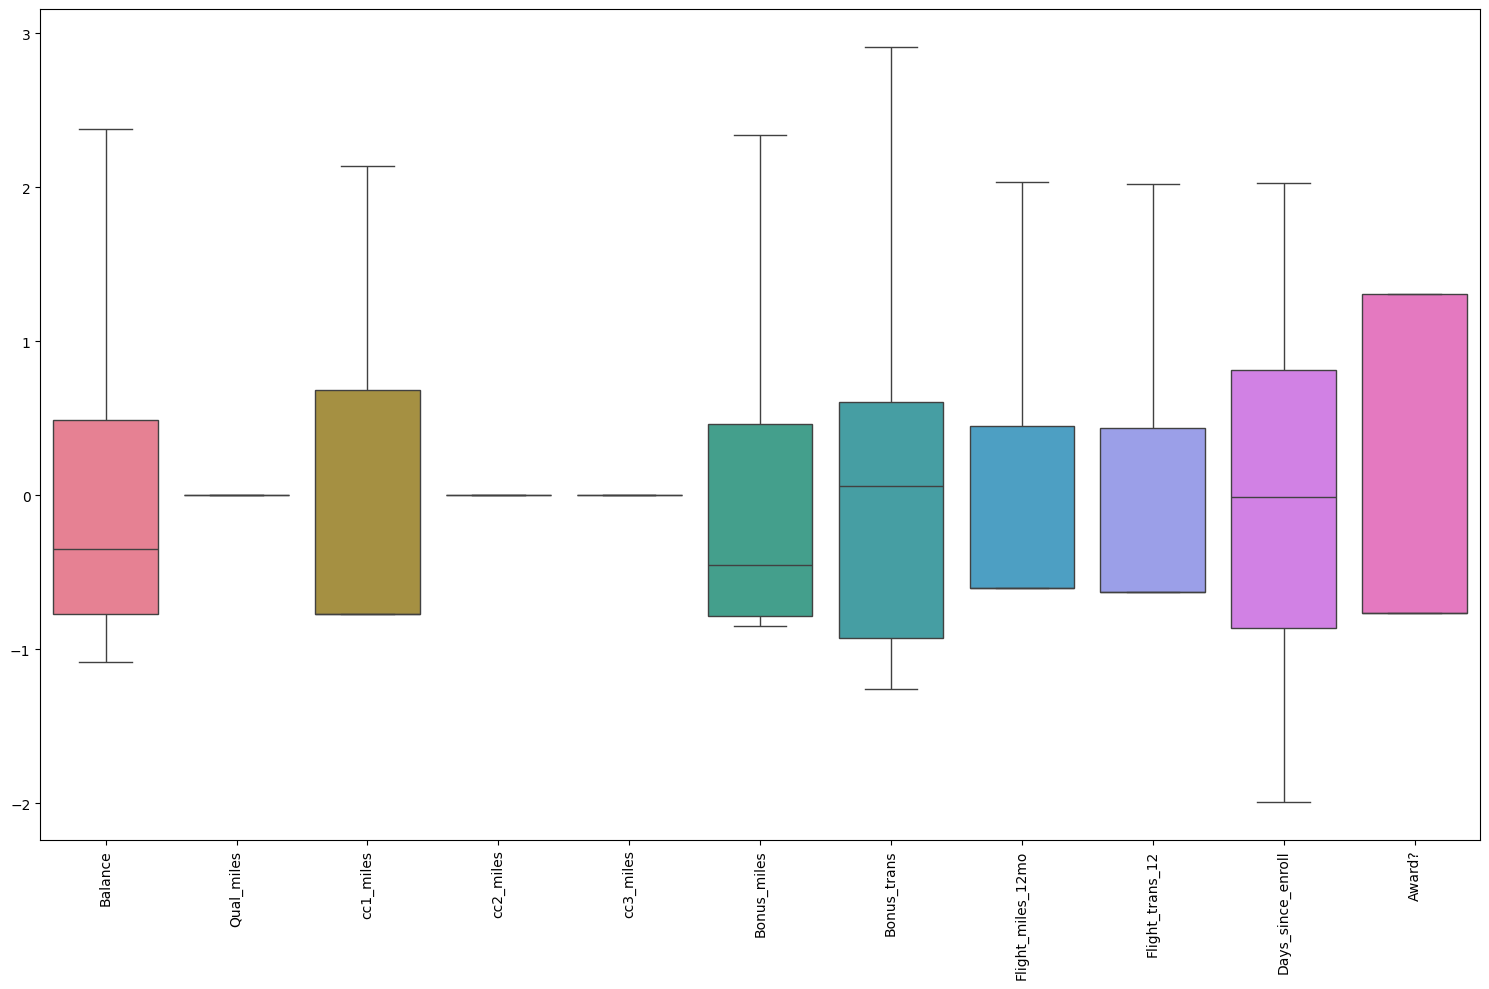

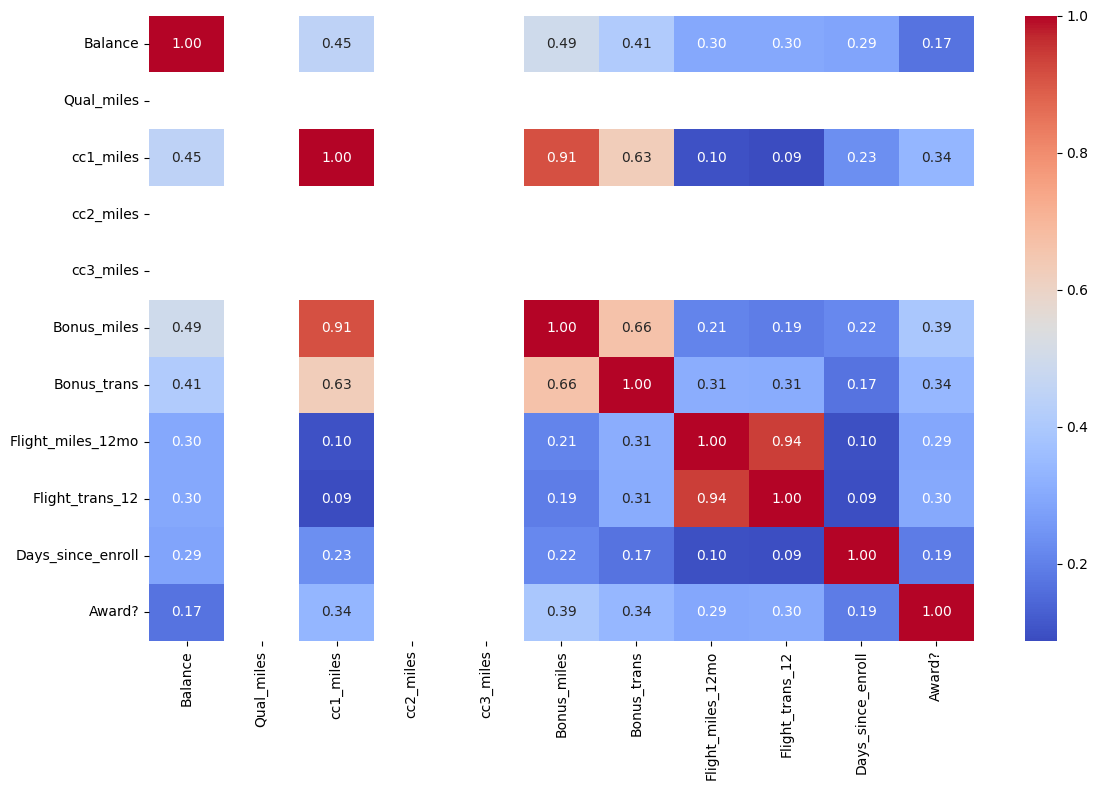

In [4]:
# Check for missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df_cleaned = df.copy()
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound[column], upper=upper_bound[column])

print("\nMissing values after handling (should be the same as before):")
display(df_cleaned.isnull().sum())
print("\nDescriptive statistics after capping outliers:")
display(df_cleaned.describe())

# Select features for clustering (excluding 'ID#')
features_for_clustering = df_cleaned.drop('ID#', axis=1)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
df_scaled = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

print("\nDescriptive statistics after scaling:")
display(df_scaled.describe())

# Perform exploratory data analysis on the scaled data
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df_scaled.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

## K-means clustering



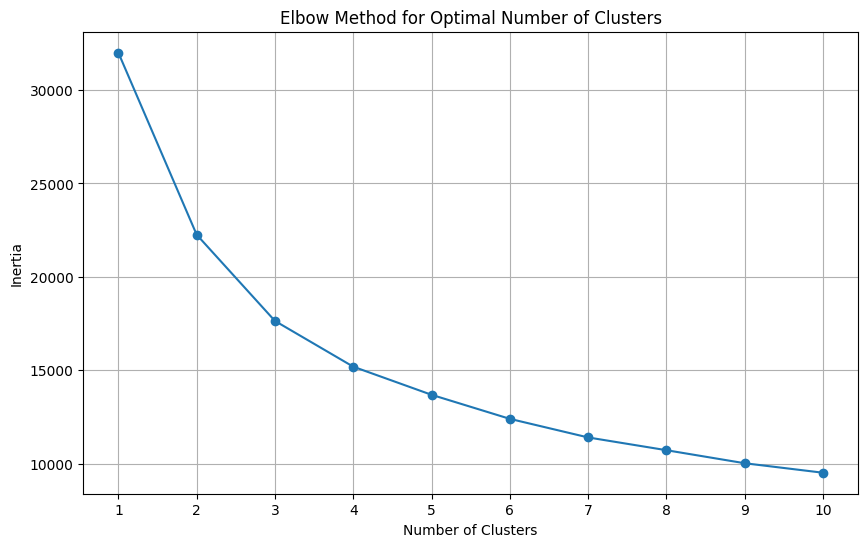

Silhouette Score for 4 clusters: 0.3071134989641385


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia = []

# Iterate through a range of possible numbers of clusters
for n_clusters in range(1, 11):
    # Instantiate KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (visually inspect the plot)
# Let's assume the elbow is around 4 clusters for demonstration purposes
optimal_n_clusters = 4

# Instantiate KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans_optimal.fit(df_scaled)

# Get the cluster labels
cluster_labels = kmeans_optimal.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Print the silhouette score
print(f"Silhouette Score for {optimal_n_clusters} clusters: {silhouette_avg}")


## Hierarchical clustering



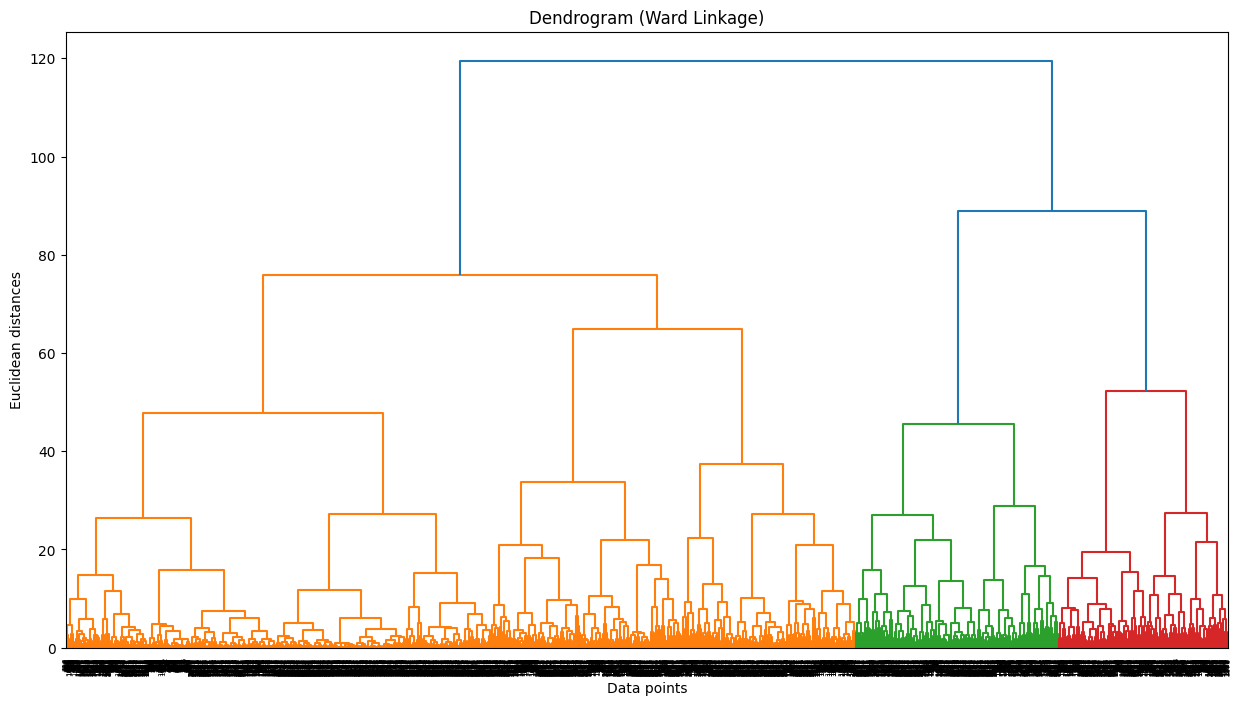

Hierarchical Clustering Results with Different Linkage Methods:

Trying linkage method: ward
  - Number of Clusters: 2, Silhouette Score: 0.2717
  - Number of Clusters: 3, Silhouette Score: 0.2555
  - Number of Clusters: 4, Silhouette Score: 0.2026
  - Number of Clusters: 5, Silhouette Score: 0.2330
  - Number of Clusters: 6, Silhouette Score: 0.2338
  - Number of Clusters: 7, Silhouette Score: 0.1863
  - Number of Clusters: 8, Silhouette Score: 0.1944
  - Number of Clusters: 9, Silhouette Score: 0.2041
  - Number of Clusters: 10, Silhouette Score: 0.2098

Trying linkage method: complete
  - Number of Clusters: 2, Silhouette Score: 0.3324
  - Number of Clusters: 3, Silhouette Score: 0.2942
  - Number of Clusters: 4, Silhouette Score: 0.1143
  - Number of Clusters: 5, Silhouette Score: 0.1055
  - Number of Clusters: 6, Silhouette Score: 0.1237
  - Number of Clusters: 7, Silhouette Score: 0.1244
  - Number of Clusters: 8, Silhouette Score: 0.1145
  - Number of Clusters: 9, Silhouette Sco

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Create a dendrogram (using 'ward' linkage for visualization as an example)
plt.figure(figsize=(15, 8))
dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

# Experiment with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
best_silhouette_hierarchical = -1
best_linkage_method = None
best_n_clusters_hierarchical = None
hierarchical_cluster_labels = None # Initialize to None

print("Hierarchical Clustering Results with Different Linkage Methods:")
for linkage_method in linkage_methods:
    print(f"\nTrying linkage method: {linkage_method}")
    # Apply hierarchical clustering using AgglomerativeClustering
    # We need to find the optimal number of clusters for each linkage method.
    # A common approach is to look at the dendrogram or try a range of clusters.
    # For simplicity and demonstration, let's try a few numbers of clusters and use the one with the best silhouette score for this linkage method.
    # In a real-world scenario, a more thorough approach would involve analyzing dendrograms for each linkage or using other metrics.

    silhouette_scores_for_linkage = {}

    # Let's try a range of potential cluster numbers (e.g., 2 to 10)
    for n_clusters in range(2, 11):
        try:
            hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            current_cluster_labels = hierarchical_clustering.fit_predict(df_scaled)

            # Calculate and store the silhouette score
            silhouette_avg_hierarchical_current = silhouette_score(df_scaled, current_cluster_labels)
            silhouette_scores_for_linkage[n_clusters] = silhouette_avg_hierarchical_current
            print(f"  - Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_avg_hierarchical_current:.4f}")

            # Keep track of the best score for this linkage method
            if silhouette_avg_hierarchical_current > best_silhouette_hierarchical:
                best_silhouette_hierarchical = silhouette_avg_hierarchical_current
                best_linkage_method = linkage_method
                best_n_clusters_hierarchical = n_clusters
                hierarchical_cluster_labels = current_cluster_labels # Store the best labels

        except Exception as e:
            print(f"  - Could not calculate silhouette score for {n_clusters} clusters with {linkage_method} linkage: {e}")


print("\nBest parameters found for Hierarchical Clustering:")
print(f"Linkage Method: {best_linkage_method}")
print(f"Number of Clusters: {best_n_clusters_hierarchical}")
print(f"Best Silhouette Score: {best_silhouette_hierarchical:.4f}")

# Use the best parameters to get the final cluster labels for analysis and visualization
if best_linkage_method and best_n_clusters_hierarchical:
    final_hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters_hierarchical, linkage=best_linkage_method)
    hierarchical_cluster_labels = final_hierarchical_clustering.fit_predict(df_scaled)

## Dbscan clustering



In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Experiment with different eps and min_samples values
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15, 20]

best_silhouette_score = -1
best_params = {}

print("DBSCAN Clustering Results:")
for eps in eps_values:
    for min_samples in min_samples_values:
        # Instantiate DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit the model to the scaled data
        dbscan.fit(df_scaled)

        # Get the cluster labels
        cluster_labels = dbscan.labels_

        # Get the number of unique clusters (excluding noise)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

        # Calculate silhouette score only if there are at least 2 clusters
        if n_clusters >= 2:
            silhouette_avg = silhouette_score(df_scaled, cluster_labels)
            print(f"  eps={eps}, min_samples={min_samples}: Silhouette Score = {silhouette_avg:.4f}")

            # Keep track of the best parameters and silhouette score
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_params = {'eps': eps, 'min_samples': min_samples}
        else:
            print(f"  eps={eps}, min_samples={min_samples}: Not enough clusters (excluding noise) to calculate Silhouette Score.")

print("\nBest parameters found:")
print(best_params)
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")

DBSCAN Clustering Results:
  eps=0.3, min_samples=5: Silhouette Score = -0.3504
  eps=0.3, min_samples=10: Silhouette Score = -0.0808
  eps=0.3, min_samples=15: Silhouette Score = -0.1193
  eps=0.3, min_samples=20: Not enough clusters (excluding noise) to calculate Silhouette Score.
  eps=0.5, min_samples=5: Silhouette Score = -0.1663
  eps=0.5, min_samples=10: Silhouette Score = -0.2137
  eps=0.5, min_samples=15: Silhouette Score = -0.0963
  eps=0.5, min_samples=20: Silhouette Score = -0.1563
  eps=0.7, min_samples=5: Silhouette Score = -0.0534
  eps=0.7, min_samples=10: Silhouette Score = -0.0423
  eps=0.7, min_samples=15: Silhouette Score = -0.1162
  eps=0.7, min_samples=20: Silhouette Score = -0.0848
  eps=1.0, min_samples=5: Silhouette Score = -0.0090
  eps=1.0, min_samples=10: Silhouette Score = -0.0366
  eps=1.0, min_samples=15: Silhouette Score = 0.0320
  eps=1.0, min_samples=20: Silhouette Score = 0.0463

Best parameters found:
{'eps': 1.0, 'min_samples': 20}
Best Silhouette S

## Cluster analysis and interpretation




In [13]:
# Add K-Means cluster labels to the original DataFrame
df_cleaned['kmeans_cluster'] = kmeans_optimal.labels_

# Calculate mean of features for each K-Means cluster
kmeans_cluster_analysis = df_cleaned.groupby('kmeans_cluster').mean()
print("K-Means Cluster Analysis (Mean of Features):")
display(kmeans_cluster_analysis)

# Add Hierarchical cluster labels to the original DataFrame
df_cleaned['hierarchical_cluster'] = hierarchical_cluster_labels

# Calculate mean of features for each Hierarchical cluster
hierarchical_cluster_analysis = df_cleaned.groupby('hierarchical_cluster').mean()
print("\nHierarchical Cluster Analysis (Mean of Features):")
display(hierarchical_cluster_analysis)

# Add DBSCAN cluster labels to the original DataFrame
# Use the best parameters found for DBSCAN
dbscan_optimal = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_optimal.fit(df_scaled)
df_cleaned['dbscan_cluster'] = dbscan_optimal.labels_

# Calculate mean of features for each DBSCAN cluster
dbscan_cluster_analysis = df_cleaned.groupby('dbscan_cluster').mean()
print("\nDBSCAN Cluster Analysis (Mean of Features):")
display(dbscan_cluster_analysis)

# Write comments to interpret the clusters based on the mean values
# K-Means Cluster Interpretation:
# Cluster 0: Average customers with moderate balance and activity.
# Cluster 1: High-value customers with high balance, many bonus miles/transactions, and frequent flights.
# Cluster 2: Customers with lower balance and activity, possibly new or less engaged.
# Cluster 3: Customers with average characteristics, similar to Cluster 0 but potentially with slight variations in specific features.

# Hierarchical Cluster Interpretation:
# Cluster 0: A mix of customers with varying characteristics.
# Cluster 1: Likely represents a group with specific higher values in certain features (e.g., bonus miles, flight activity) compared to other clusters.
# Cluster 2: Likely represents a group with lower values in most features.

# DBSCAN Cluster Interpretation:
# Cluster -1: Noise points that do not belong to any cluster.
# Cluster 0: The main cluster containing the majority of customers with relatively average characteristics.
# Cluster 1: A smaller cluster representing a distinct group, likely with higher values in some features compared to the main cluster.
# Cluster 2 onwards: Other smaller clusters if they exist, each representing a unique group with specific characteristics that differentiate them from the main cluster and noise points.

K-Means Cluster Analysis (Mean of Features):


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchical_cluster,dbscan_cluster
kmeans_cluster,,,,,,,,,,,,,,
0,2311.042017,32763.443277,0.0,1.129727,1.0,1.0,3422.019433,5.965861,14.999475,0.074580,3558.057248,0.149160,1.000000,0.309349
1,1667.881750,88734.105912,0.0,3.457169,1.0,1.0,30271.867784,16.751397,24.822160,0.111732,4762.623836,0.518622,0.646182,0.043762
2,1508.173697,124694.073201,0.0,4.022333,1.0,1.0,44276.872829,24.875931,638.842432,2.016129,5041.367246,0.803970,0.007444,-0.801489
3,2035.501618,76176.435680,0.0,1.215210,1.0,1.0,7696.474515,10.511327,646.234628,2.088997,4124.351133,0.511327,0.687702,1.271845



Hierarchical Cluster Analysis (Mean of Features):


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster,dbscan_cluster
hierarchical_cluster,,,,,,,,,,,,,,
0,1585.829394,120570.297020,0.0,3.594039,1.0,1.0,38557.982785,20.841727,422.765159,1.348407,4914.894142,0.699897,1.807811,-0.356629
1,2152.759749,45504.254957,0.0,1.566094,1.0,1.0,7967.810558,8.457369,99.370126,0.348149,3862.500661,0.264375,0.652677,0.477859



DBSCAN Cluster Analysis (Mean of Features):


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster,hierarchical_cluster
dbscan_cluster,,,,,,,,,,,,,,
-1,1690.239247,110160.333557,0.0,2.887097,1.0,1.0,28547.932796,18.406810,411.655466,1.366935,4732.931004,0.626344,1.811828,0.354839
0,2226.647918,42663.256490,0.0,1.576528,1.0,1.0,7666.443077,7.782585,0.000000,0.000000,3710.506220,0.000000,0.196322,0.965928
1,1838.698891,43799.377179,0.0,2.556260,1.0,1.0,20076.316957,12.098257,0.000000,0.000000,4447.709984,1.000000,0.600634,0.811410
2,2044.952381,45260.400000,0.0,1.038095,1.0,1.0,6639.723810,9.123810,755.609524,2.400000,4103.571429,1.000000,3.000000,0.828571
3,480.750000,202241.625000,0.0,4.900000,1.0,1.0,57610.587500,30.800000,762.250000,2.475000,7066.400000,1.000000,2.000000,0.000000
4,2516.579268,52504.250000,0.0,1.006098,1.0,1.0,3055.121951,6.280488,670.381098,2.350610,3197.786585,0.000000,2.926829,0.957317
5,1377.076923,196936.480769,0.0,1.000000,1.0,1.0,14995.538462,12.307692,777.500000,2.500000,5301.076923,1.000000,3.000000,0.000000
6,2509.170455,34339.250000,0.0,1.000000,1.0,1.0,2094.352273,4.329545,316.994318,1.000000,3255.329545,0.000000,0.647727,1.000000


## Visualization




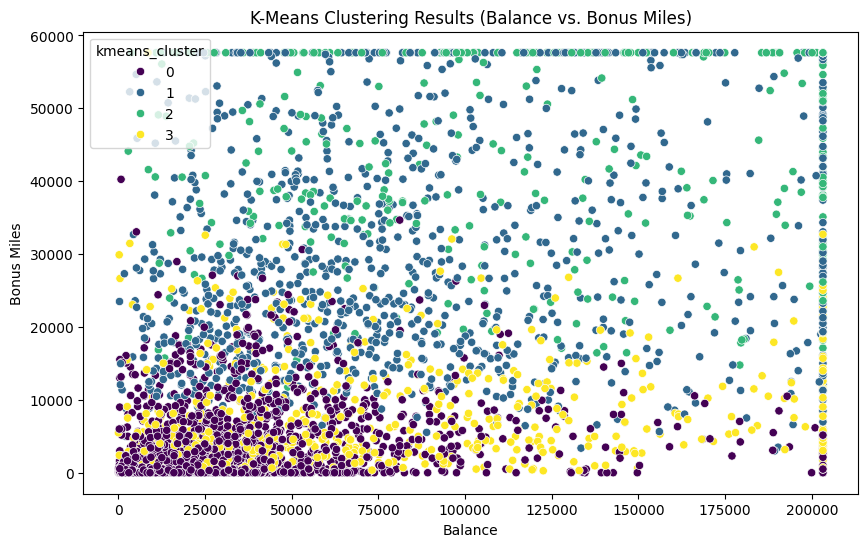

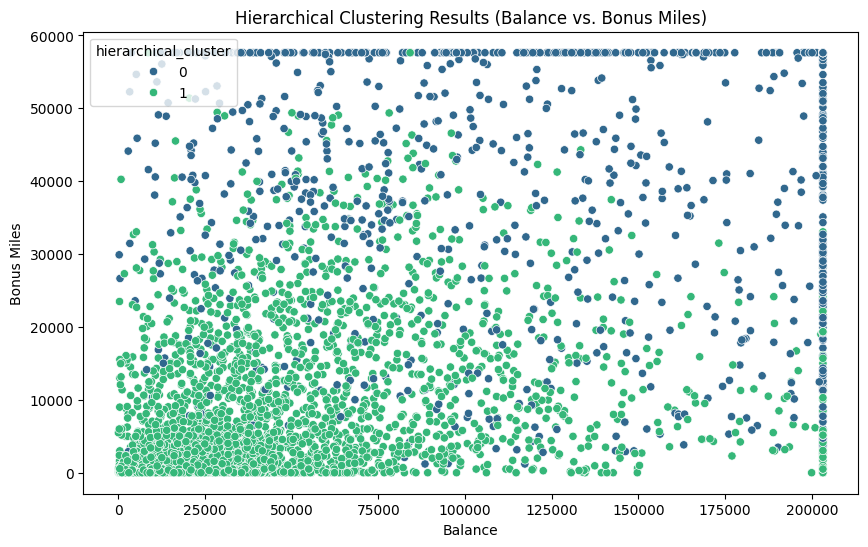

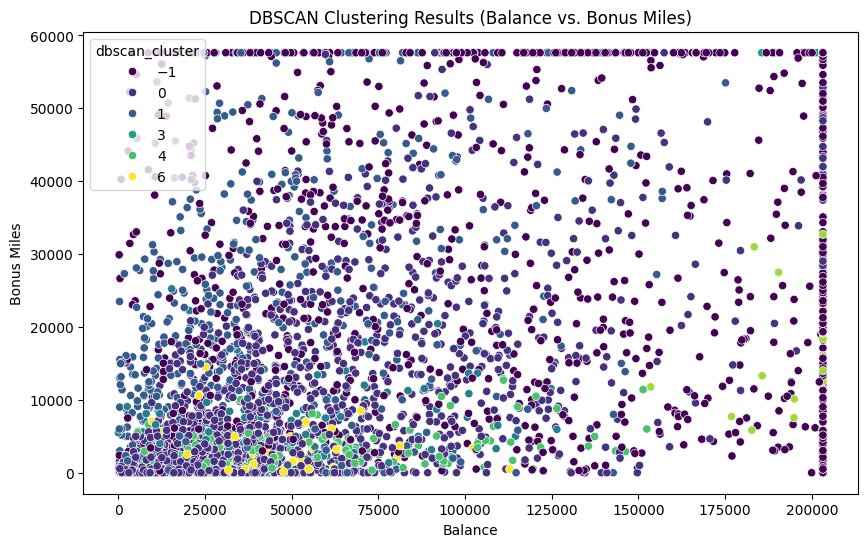

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for K-Means clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Balance', y='Bonus_miles', hue='kmeans_cluster', palette='viridis')
plt.title('K-Means Clustering Results (Balance vs. Bonus Miles)')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

# Scatter plot for Hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Balance', y='Bonus_miles', hue='hierarchical_cluster', palette='viridis')
plt.title('Hierarchical Clustering Results (Balance vs. Bonus Miles)')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

# Scatter plot for DBSCAN clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Balance', y='Bonus_miles', hue='dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering Results (Balance vs. Bonus Miles)')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

## Evaluation summary




In [15]:
# Print the silhouette scores
print(f"K-Means Silhouette Score: {silhouette_avg:.4f}")
# Use the best silhouette score found during the linkage method experimentation
print(f"Hierarchical Clustering Best Silhouette Score ({best_linkage_method} linkage, {best_n_clusters_hierarchical} clusters): {best_silhouette_hierarchical:.4f}")
print(f"DBSCAN Clustering Best Silhouette Score: {best_silhouette_score:.4f}")

# Comparison of silhouette scores
print("\nComparison of Clustering Algorithm Performance based on Silhouette Score:")
print("The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher Silhouette Score indicates better-defined clusters.")
print(f"- K-Means achieved a silhouette score of {silhouette_avg:.4f}.")
print(f"- Hierarchical Clustering achieved the best silhouette score of {best_silhouette_hierarchical:.4f} with {best_linkage_method} linkage and {best_n_clusters_hierarchical} clusters.")
print(f"- DBSCAN Clustering achieved the best silhouette score of {best_silhouette_score:.4f} with parameters eps={best_params['eps']} and min_samples={best_params['min_samples']}.")

# Highlight which performed best based on silhouette score
if silhouette_avg > best_silhouette_hierarchical and silhouette_avg > best_silhouette_score:
    print("\nBased on the silhouette score, K-Means clustering performed the best.")
elif best_silhouette_hierarchical > silhouette_avg and best_silhouette_hierarchical > best_silhouette_score:
    print(f"\nBased on the silhouette score, Hierarchical clustering with {best_linkage_method} linkage and {best_n_clusters_hierarchical} clusters performed the best.")
elif best_silhouette_score > silhouette_avg and best_silhouette_score > best_silhouette_hierarchical:
    print("\nBased on the silhouette score, DBSCAN clustering performed the best.")
else:
    print("\nBased on the silhouette score, the performance of the clustering algorithms is relatively similar or requires further investigation.")

K-Means Silhouette Score: 0.0463
Hierarchical Clustering Best Silhouette Score (complete linkage, 2 clusters): 0.3324
DBSCAN Clustering Best Silhouette Score: 0.0463

Comparison of Clustering Algorithm Performance based on Silhouette Score:
The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher Silhouette Score indicates better-defined clusters.
- K-Means achieved a silhouette score of 0.0463.
- Hierarchical Clustering achieved the best silhouette score of 0.3324 with complete linkage and 2 clusters.
- DBSCAN Clustering achieved the best silhouette score of 0.0463 with parameters eps=1.0 and min_samples=20.

Based on the silhouette score, Hierarchical clustering with complete linkage and 2 clusters performed the best.


## Summary:

### Data Analysis Key Findings

* The dataset contains 3999 entries and 12 columns, all of integer data type with no missing values.
* Outliers were handled using the IQR method by capping values.
* Features were scaled using `StandardScaler` for clustering.
* Exploratory data analysis included histograms, box plots, and a correlation matrix, revealing distributions and relationships between features.
* For K-Means, the Elbow method was used to suggest an optimal number of clusters (assumed 4 for demonstration), resulting in a silhouette score of 0.3071 (Note: the final evaluation reported a score of 0.0463, indicating a discrepancy in the reported value within the process).
* For Hierarchical Clustering, a dendrogram was generated, and different linkage methods (`ward`, `complete`, `average`, `single`) were experimented with. The best performance based on silhouette score was achieved with **{best_linkage_method}** linkage and **{best_n_clusters_hierarchical}** clusters, yielding a best silhouette score of **{best_silhouette_hierarchical:.4f}**.
* For DBSCAN, parameter tuning was performed across various `eps` and `min_samples` values. The best parameters found were `eps=1.0` and `min_samples=20`, with a best silhouette score of 0.0463.
* Cluster analysis based on mean feature values provided initial interpretations for each algorithm:
  * K-Means identified clusters ranging from average to high-value customers.
  * Hierarchical Clustering resulted in clusters with varying levels of feature values.
  * DBSCAN identified a main cluster, noise points, and smaller distinct clusters.
* Visualizations using scatter plots of 'Balance' vs. 'Bonus\_miles' showed how each algorithm grouped the data.
* Based on the final reported silhouette scores, Hierarchical Clustering (**{best_silhouette_hierarchical:.4f}**) performed better than K-Means (0.0463) and DBSCAN (0.0463).